In [1]:
# Yeray Santana Falcón
# November 2018

####### Importing libraries ###########################
from netCDF4 import Dataset, MFDataset, num2date
import numpy as np
import numpy.ma as ma

import matplotlib.pylab as plt 
import matplotlib.ticker as mticker
from matplotlib import cm
from matplotlib import gridspec

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import os
import cmocean as cmo
%autosave 80

Autosaving every 80 seconds


In [2]:
# One option is to use wget to download the image 
!wget https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/A20182742018304.L3m_MO_CHL_chlor_a_4km.nc
!wget https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface/grid_registered/netcdf/ETOPO1_Ice_g_gmt4.grd.gz
!gunzip './ETOPO1_Ice_g_gmt4.grd.gz'

--2018-12-14 12:35:09--  https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/A20182742018304.L3m_MO_CHL_chlor_a_4km.nc
Résolution de oceandata.sci.gsfc.nasa.gov (oceandata.sci.gsfc.nasa.gov)… 169.154.128.84, 2001:4d0:2418:128::84
Connexion à oceandata.sci.gsfc.nasa.gov (oceandata.sci.gsfc.nasa.gov)|169.154.128.84|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 55601916 (53M) [application/octet-stream]
Sauvegarde en : « A20182742018304.L3m_MO_CHL_chlor_a_4km.nc »

A20182742018304.L3m 100%[=====================>]  53,03M  21,8MB/s   ds 2,4s   

2018-12-14 12:35:12 (21,8 MB/s) — « A20182742018304.L3m_MO_CHL_chlor_a_4km.nc » sauvegardé [55601916/55601916]

--2018-12-14 12:35:12--  https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface/grid_registered/netcdf/ETOPO1_Ice_g_gmt4.grd.gz
Résolution de www.ngdc.noaa.gov (www.ngdc.noaa.gov)… 140.172.190.1
Connexion à www.ngdc.noaa.gov (www.ngdc.noaa.gov)|140.172.190.1|:443… connecté.
requête HTTP transmis

#### Generic notepad for importing Natural Earth features, GMT colormaps, and for discretizing the colormap chosen 

In [3]:
import cartopy.feature as cfeature 

land_10m = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor=cfeature.COLORS['land']
    )
states_provinces = cfeature.NaturalEarthFeature(
    category = 'cultural',
    name = 'admin_1_states_provinces_lines',
    scale = '10m',
    facecolor = 'none'
    )
minorislands_10m = cfeature.NaturalEarthFeature(
    'physical', 'Minor Islands', '50m',
    edgecolor = 'face',
    facecolor = cfeature.COLORS['land_alt1']
    )
natearth = cfeature.NaturalEarthFeature(
    category = 'raster',
    name = 'Natural_Earth_1',
    scale = '10m',
    facecolor = 'none'
    )

"""
extra colormaps:
* Generic Mapping Tools colormaps: GMT_drywet,GMT_gebco,GMT_globe,GMT_haxby
GMT_no_green,GMT_ocean,GMT_polar,GMT_red2green,GMT_relief,GMT_split,
GMT_wysiwyg
* Stepped-sequential scheme: StepSeq
* A nonlinear precipitation colormap:  s3pcpn
* A linear version of the precip colormap: s3pcpn_l
run examples/show_colormaps.py to see what these colormaps look like.
"""

from matplotlib import rcParams, colors
_LUTSIZE = rcParams['image.lut']

_GMT_gebco_data =  {'blue': [(0.0, 1.0, 1.0), (0.147058829665, 1.0, 1.0), (0.29411765933, 1.0, 1.0), (0.441176474094, 0.901960790157, 0.901960790157), (0.588235318661, 0.843137264252, 0.843137264252), (0.735294103622, 0.843137264252, 0.843137264252), (0.882352948189, 0.843137264252, 0.843137264252), (0.955882370472, 0.941176474094, 0.941176474094), (1.0, 1.0, 1.0)], 'green': [(0.0, 0.941176474094, 0.941176474094), (0.147058829665, 1.0, 1.0), (0.29411765933, 1.0, 1.0), (0.441176474094, 1.0, 1.0), (0.588235318661, 1.0, 1.0), (0.735294103622, 1.0, 1.0), (0.882352948189, 1.0, 1.0), (0.955882370472, 1.0, 1.0), (1.0, 1.0, 1.0)], 'red': [(0.0, 0.0, 0.0), (0.147058829665, 0.137254908681, 0.137254908681), (0.29411765933, 0.352941185236, 0.352941185236), (0.441176474094, 0.549019634724, 0.549019634724), (0.588235318661, 0.647058844566, 0.647058844566), (0.735294103622, 0.764705896378, 0.764705896378), (0.882352948189, 0.823529422283, 0.823529422283), (0.955882370472, 0.901960790157, 0.901960790157), (1.0, 0.921568632126, 0.921568632126)]}
_GMT_haxby_data =  {'blue': [(0.0, 0.474509805441, 0.474509805441), (0.0322580635548, 0.588235318661, 0.588235318661), (0.0645161271095, 0.686274528503, 0.686274528503), (0.0967741906643, 0.784313738346, 0.784313738346), (0.129032254219, 0.831372559071, 0.831372559071), (0.161290317774, 0.878431379795, 0.878431379795), (0.193548381329, 0.941176474094, 0.941176474094), (0.225806444883, 0.972549021244, 0.972549021244), (0.258064508438, 1.0, 1.0), (0.290322571993, 1.0, 1.0), (0.322580635548, 1.0, 1.0), (0.354838699102, 0.941176474094, 0.941176474094), (0.387096762657, 0.882352948189, 0.882352948189), (0.419354826212, 0.784313738346, 0.784313738346), (0.451612889767, 0.68235296011, 0.68235296011), (0.483870953321, 0.658823549747, 0.658823549747), (0.516129016876, 0.635294139385, 0.635294139385), (0.548387110233, 0.552941203117, 0.552941203117), (0.580645143986, 0.474509805441, 0.474509805441), (0.612903237343, 0.407843142748, 0.407843142748), (0.645161271095, 0.341176480055, 0.341176480055), (0.677419364452, 0.270588248968, 0.270588248968), (0.709677398205, 0.29411765933, 0.29411765933), (0.741935491562, 0.305882364511, 0.305882364511), (0.774193525314, 0.352941185236, 0.352941185236), (0.806451618671, 0.486274510622, 0.486274510622), (0.838709652424, 0.61960786581, 0.61960786581), (0.870967745781, 0.68235296011, 0.68235296011), (0.903225779533, 0.768627464771, 0.768627464771), (0.93548387289, 0.843137264252, 0.843137264252), (0.967741906643, 0.921568632126, 0.921568632126), (1.0, 1.0, 1.0)], 'green': [(0.0, 0.0, 0.0), (0.0322580635548, 0.0, 0.0), (0.0645161271095, 0.0196078438312, 0.0196078438312), (0.0967741906643, 0.0392156876624, 0.0392156876624), (0.129032254219, 0.0980392172933, 0.0980392172933), (0.161290317774, 0.156862750649, 0.156862750649), (0.193548381329, 0.40000000596, 0.40000000596), (0.225806444883, 0.505882382393, 0.505882382393), (0.258064508438, 0.686274528503, 0.686274528503), (0.290322571993, 0.745098054409, 0.745098054409), (0.322580635548, 0.792156875134, 0.792156875134), (0.354838699102, 0.882352948189, 0.882352948189), (0.387096762657, 0.921568632126, 0.921568632126), (0.419354826212, 0.921568632126, 0.921568632126), (0.451612889767, 0.92549020052, 0.92549020052), (0.483870953321, 0.960784316063, 0.960784316063), (0.516129016876, 1.0, 1.0), (0.548387110233, 0.960784316063, 0.960784316063), (0.580645143986, 0.92549020052, 0.92549020052), (0.612903237343, 0.843137264252, 0.843137264252), (0.645161271095, 0.741176486015, 0.741176486015), (0.677419364452, 0.627451002598, 0.627451002598), (0.709677398205, 0.458823531866, 0.458823531866), (0.741935491562, 0.313725501299, 0.313725501299), (0.774193525314, 0.352941185236, 0.352941185236), (0.806451618671, 0.486274510622, 0.486274510622), (0.838709652424, 0.61960786581, 0.61960786581), (0.870967745781, 0.701960802078, 0.701960802078), (0.903225779533, 0.768627464771, 0.768627464771), (0.93548387289, 0.843137264252, 0.843137264252), (0.967741906643, 0.921568632126, 0.921568632126), (1.0, 1.0, 1.0)], 'red': [(0.0, 0.0392156876624, 0.0392156876624), (0.0322580635548, 0.156862750649, 0.156862750649), (0.0645161271095, 0.0784313753247, 0.0784313753247), (0.0967741906643, 0.0, 0.0), (0.129032254219, 0.0, 0.0), (0.161290317774, 0.0, 0.0), (0.193548381329, 0.101960785687, 0.101960785687), (0.225806444883, 0.0509803928435, 0.0509803928435), (0.258064508438, 0.0980392172933, 0.0980392172933), (0.290322571993, 0.196078434587, 0.196078434587), (0.322580635548, 0.266666680574, 0.266666680574), (0.354838699102, 0.380392163992, 0.380392163992), (0.387096762657, 0.415686279535, 0.415686279535), (0.419354826212, 0.486274510622, 0.486274510622), (0.451612889767, 0.541176497936, 0.541176497936), (0.483870953321, 0.674509823322, 0.674509823322), (0.516129016876, 0.803921580315, 0.803921580315), (0.548387110233, 0.874509811401, 0.874509811401), (0.580645143986, 0.941176474094, 0.941176474094), (0.612903237343, 0.96862745285, 0.96862745285), (0.645161271095, 1.0, 1.0), (0.677419364452, 1.0, 1.0), (0.709677398205, 0.956862747669, 0.956862747669), (0.741935491562, 0.933333337307, 0.933333337307), (0.774193525314, 1.0, 1.0), (0.806451618671, 1.0, 1.0), (0.838709652424, 1.0, 1.0), (0.870967745781, 0.960784316063, 0.960784316063), (0.903225779533, 1.0, 1.0), (0.93548387289, 1.0, 1.0), (0.967741906643, 1.0, 1.0), (1.0, 1.0, 1.0)]}
GMT_gebco = colors.LinearSegmentedColormap('GMT_gebco', _GMT_gebco_data, _LUTSIZE)
GMT_haxby = colors.LinearSegmentedColormap('GMT_haxby', _GMT_haxby_data, _LUTSIZE)
datad={}
datad['GMT_gebco']=_GMT_gebco_data
datad['GMT_haxby']=_GMT_haxby_data

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

# Get a custom cartopy of land
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/home/santanay/cartopy/BG/"

In [4]:
######### Parameters to be define at the start ##############
VARname = 'CHL'                  # A string defining the variable of interest
scale = 1                        # If we need to make a change of scale or units 
fill_value = -32767.0              # Specifying the value to be NaN
L = [.05,.1,0.3,0.5,1,2,5]       # Specifying the limits in log
folder = '/home/santanay/Data/Canbas4/'
levels = [-3000,-2000,-1000,-100]# Specifying the z-levels for printing bathymetry
date = '9-16 Nov 2018'           # Specify the date of the plot (might use datetime package instead) 
sat = 'MODIS-Aqua'               # Source of the satellite
#indir = ''                      # Folder in which files are located
#infile = indir + ''             # File (or a random file to extract the grid) 
infile = './A20182742018304.L3m_MO_CHL_chlor_a_4km.nc'
########## Extracting the grid info ##########################
nc = Dataset(infile)             # Open the file
slat = nc.variables['lat'][:]       # Extract lat, lon, and depth
slat_units = nc.variables['lat'].units
slon = nc.variables['lon'][:]
nc.close()
[X, Y] = np.meshgrid(slon,slat)  # Creating a meshgrid from lon,lat

start_lat = -21                  # Reduce the grid
end_lat =  81
start_lon = -103
end_lon =  36
#
a = abs(Y-start_lat)+abs(X-start_lon)
i,j = np.unravel_index(a.argmin(),a.shape)
#
b = abs(Y-end_lat)+abs(X-end_lon)
k,g = np.unravel_index(b.argmin(),b.shape)
#
print('Lon in the grid goes from', X[i,j], 'to', X[k,g])
print('Lat in the grid goes from', Y[i,j], 'to', Y[k,g])
slon = X[k:i,j:g]                # Remap lon and lat
slat = Y[k:i,j:g]
[sm,sn] = slon.shape             # Get the shape
del (X,Y,a,b)

Lon in the grid goes from -103.02083 to 35.979176
Lat in the grid goes from -20.97917 to 81.02083


#### Extracting data using a loop over files
It might be use only for one file as well

In [5]:
if sat == 'MODIS-Aqua':
        nc = Dataset(infile,'r')
        sVAR = nc.variables['chlor_a'][k:i,j:g]
        nc.close()

sVAR.data[sVAR.data == fill_value] = np.nan
sVAR = ma.masked_where(np.isnan(sVAR.data),sVAR.data)

scmod = np.log10(sVAR)
smnmod = np.min(scmod)
srngmod = np.max(scmod-smnmod)
scmod = 1+63*(scmod-smnmod)/srngmod             # self scale data
sl = 1+63*(np.log10(L)-smnmod)/srngmod

print(scmod.max())                              # Make sure everything is ok

del (k,i,j,g)

64.0


#### Define the date precisely 
 Info may be extracted from the netCDF file 

In [6]:
from datetime import date, timedelta

days_ini = 274  -1               # This may work for floats in general, but using integers
days_end = 304  -1               #   is more precise (e.g. days = int(9465.0))

start = date(2018,1,1)           # This is the "days since" part

delta_ini = timedelta(days_ini)  # Create a time delta object from the number of days
delta_end = timedelta(days_end)

offset = [start + delta_ini, 
          start + delta_end]     # Add the specified number of days to start

print(offset)                    # >>>  

[datetime.date(2018, 10, 1), datetime.date(2018, 10, 31)]


#### Taking bathymetry data from my own dataset
It might be use for other sources

In [36]:
#batiname = folder + 'ETOPOIgor.nc'
batiname = './ETOPO1_Ice_g_gmt4.grd'
nc = Dataset(batiname)
blat = nc.variables['x'][:]
blon = nc.variables['y'][:]
nc.close()
#[X,Y] = np.meshgrid(blon,blat)              # Creating a meshgrid
#start_lat = -50                              # Choose points to reduce
#end_lat =  85
#start_lon = -95
#end_lon =  35
#
#a = abs(Y-start_lat)+abs(X-start_lon)
#i,j = np.unravel_index(a.argmin(),a.shape)
#
#b = abs(Y-end_lat)+abs(X-end_lon)
#k,q = np.unravel_index(b.argmin(),b.shape)
#
#print('Lat in the grid goes from', Y[i,j], 'to', Y[k,q])
#print('Lon in the grid goes from', X[i,j], 'to', X[k,q])

#blon = X[i:k,j:q]                            # Reduce the grid
#blat = Y[i:k,j:q]
nc = Dataset(batiname)                       # Select the elevation 
he = nc.variables['z'][:]
nc.close()

**Making the figure**

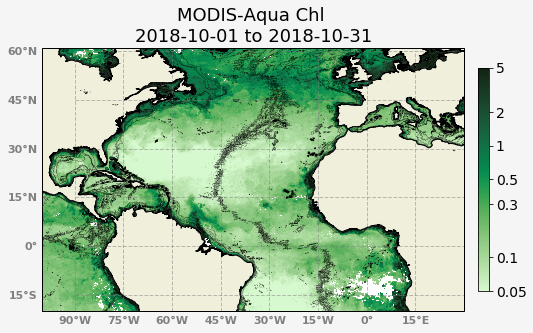

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


In [39]:
fig = plt.figure(figsize=[8.,10.])                 # Print a map
fig.patch.set_facecolor('whitesmoke')              # Background color
gs = gridspec.GridSpec(1, 1)                       # As many subplots as we need (rows,columns)
gs.update(wspace = 0.25, hspace = 0.1)             # set the spacing between axes
VAR2plot = [scmod,scmod]                           # If we have more than 1 variable
vname = ['MODIS-Aqua Chl',                         # Different names of the variables for the labels 
         '']                                       # VARname could be used here as well                             
long = [slon,slon]                                 # If they do not share the same grid
lati = [slat,slat]
limits = [sl,sl]                                   # If they do not share their limits
Limits = [L,L]
indice = [0]                                       # As many subplots as neccessary
for ii in indice:
    ax = plt.subplot(gs[ii], 
                     projection = ccrs.PlateCarree())
    ax.set_facecolor("black")
    ax.set_title(vname[ii] + ' \n'
                 +str(offset[0]) +' to ' +str(offset[1]),
                 fontsize = 18)                    # Here we define the title of each subplot
                                                   # offset comes from datetime, while \n leap a line
    ax.axis([-100, 30, -20, 61])                     # set the limits of the plot
    ax.add_feature(land_10m, edgecolor='gray')     # Put the background land
    #ax.background_img(name='BMUHD', resolution='high')
    ax.coastlines(resolution='10m', zorder=100)    # Put the coastlines
                                                   # Here the figure. 
                                                   # vmin and vmax defined before can be use here
                                                   # discrete_cmap indicates number of lines and cmap chosen
    mm = ax.pcolormesh(long[ii], lati[ii], VAR2plot[ii],
                       vmin = np.min(limits[ii]),
                       vmax = np.max(limits[ii]),
                       transform = ccrs.PlateCarree(),
                       cmap = discrete_cmap(150, cmo.cm.algae)) 
                                                   # We can add a contourf for aesthetic reasons
                                                   # 150 is the number of lines, can be edit
    ax.contourf(long[ii], lati[ii], VAR2plot[ii],150,
                       vmin = np.min(limits[ii]),
                       vmax = np.max(limits[ii]),
                       transform = ccrs.PlateCarree(),
                       cmap = discrete_cmap(150, cmo.cm.algae)) 
                                                   # We can add a contour for bathymetry
                                                   # Levels are chosen in parameters
    ax.contour(blat, blon, he, levels,
           colors = 'k', linewidths = .35)         # Lat comes first since ETOPO netcdf is saved upside down
                                                   # Here we include the gridlines
    gl = ax.gridlines(crs = ccrs.PlateCarree(), 
                      draw_labels = True,
                      linewidth = 1, color = 'gray',
                      alpha = 0.5, linestyle = '--')
    gl.xlabels_top = False                         # We can define a parameter like etiq = [True,False,True]
    gl.ylabels_right = False                       # for definig what labels appear
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
    gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
    gl.ylocator = mticker.FixedLocator(
        [-30,-15,0,15,30,45,60]
        )                                          # specifies where
    gl.xlocator = mticker.FixedLocator(
        [-90,-75,-60,-45,-30,-15,0,15,30,45]
        )                                          # specifies where
                                                   # Defining the colorbar, might be made in the following 2 ways
    cbar = fig.colorbar(mm, orientation='vertical',
                        aspect=20,fraction=0.025, pad=0.03) 
    
    #cbar_ax = fig.add_axes([0.235, 0.37, 0.345, 0.02])
    #cbar = plt.colorbar(mm,cax = cbar_ax,
    #                    orientation="horizontal")
    
    cbar.set_ticks(limits[ii])
    cbar.set_ticklabels(Limits[ii])
    cbar.ax.tick_params(labelsize = 14)
####################################################
plt.show(fig)
#%matplotlib inline
%time

In [11]:
# Saving the figure
pngname = folder + str(VARname) + '_' + str(sat) + '_algae_Nov2018_yeraysf.png'
print ('save: ', pngname)
fig.savefig(pngname, dpi=300, facecolor='w', edgecolor='w',
            orientation='', papertype=None, format=None,
            transparent=False, bbox_inches='tight', pad_inches=0.1)
print ('plot finished')

save:  /home/santanay/Data/Canbas4/CHL_MODIS-Aqua_algae_Nov2018_yeraysf.png
plot finished
